In [2]:
import os
os.chdir("/home/zhuoyan/vision/adaptive_inference")
import numpy as np
from collections import defaultdict 


In [3]:
# data_path = "/Users/zyxu/Documents/py/vision/adaptive_inference/log/resnet50_imagenet"
data_path = "/home/zhuoyan/vision/adaptive_inference/log/subset5000/testEval_resnet18_imagenet"

In [5]:
res = defaultdict(list)
for i in range(8):
    file = f"resnet18_imagenet_skip{i}.npz"
    data = np.load(f"{data_path}/{file}")
    for key in data:
        res[key].append(data[key])

In [6]:
res.keys()

dict_keys(['masks', 'accs', 'over_accs', 'macs_total'])

In [7]:
res['over_accs']

[array([0.7124]),
 array([0.6752, 0.674 , 0.6836, 0.6714, 0.6734, 0.6512, 0.6434]),
 array([0.5566, 0.6022, 0.611 , 0.6194, 0.607 , 0.6066, 0.5286, 0.5938,
        0.6038, 0.5994, 0.5996, 0.5642, 0.602 , 0.5992, 0.6038, 0.497 ,
        0.566 , 0.582 , 0.5254, 0.5702, 0.4884]),
 array([0.1568, 0.4126, 0.4348, 0.464 , 0.4648, 0.429 , 0.4784, 0.5086,
        0.5222, 0.3928, 0.4982, 0.5232, 0.4406, 0.5058, 0.4382, 0.2032,
        0.3206, 0.4152, 0.4344, 0.3368, 0.4656, 0.491 , 0.4282, 0.4928,
        0.4338, 0.2956, 0.4362, 0.4688, 0.4064, 0.4826, 0.436 , 0.228 ,
        0.351 , 0.3802, 0.318 ]),
 array([0.0276, 0.0386, 0.097 , 0.1048, 0.1578, 0.2936, 0.319 , 0.2642,
        0.3208, 0.2992, 0.1334, 0.2964, 0.3384, 0.2888, 0.353 , 0.3434,
        0.1426, 0.257 , 0.311 , 0.241 , 0.0362, 0.13  , 0.132 , 0.1694,
        0.1976, 0.256 , 0.1042, 0.202 , 0.2774, 0.2252, 0.1028, 0.1854,
        0.2594, 0.2216, 0.0782]),
 array([0.0066, 0.0194, 0.0196, 0.0258, 0.0276, 0.0492, 0.0364, 0.0778,
      

In [8]:
res['macs_total']

[array([1.]),
 array([0.8724519 , 0.90450418, 0.87278247, 0.9046694 , 0.87294757,
        0.90475202, 0.87303019]),
 array([0.77695608, 0.74523437, 0.77712131, 0.74539959, 0.77720392,
        0.74548221, 0.77728653, 0.80917358, 0.77745175, 0.8092562 ,
        0.77753437, 0.77745175, 0.74573004, 0.77753437, 0.74581265,
        0.77761698, 0.80942142, 0.77769959, 0.77769959, 0.74597788,
        0.7777822 ]),
 array([0.64973855, 0.68162549, 0.64990366, 0.6817081 , 0.64998627,
        0.64990377, 0.61818194, 0.64998633, 0.61826456, 0.65006894,
        0.68187332, 0.65015155, 0.65015149, 0.61842978, 0.6502341 ,
        0.68195593, 0.65023416, 0.68203855, 0.65031672, 0.68212116,
        0.7139256 , 0.68220377, 0.68220377, 0.65048194, 0.68228638,
        0.65039945, 0.68220377, 0.650482  , 0.650482  , 0.61876023,
        0.65056455, 0.68236899, 0.65064722, 0.68245161, 0.65072978]),
 array([0.55440789, 0.52268612, 0.55449051, 0.52276874, 0.55457306,
        0.5863775 , 0.55465567, 0.55465567, 

In [9]:
accs = np.concatenate(res['over_accs'])
accs[:5]

array([0.7124, 0.6752, 0.674 , 0.6836, 0.6714])

In [10]:
macs = np.concatenate(res['macs_total'])
macs[-5:]

array([0.3004683 , 0.33235532, 0.30063352, 0.33268577, 0.2051377 ])

In [11]:
res_vis = {"accs": accs, "macs": macs}

## dataframe

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(res_vis)
df

,accs,macs
0,0.7124,1.000000
1,0.6752,0.872452
2,0.6740,0.904504
3,0.6836,0.872782
4,0.6714,0.904669
...,...,...
123,0.0140,0.300468
124,0.0136,0.332355
125,0.0172,0.300634
126,0.0104,0.332686


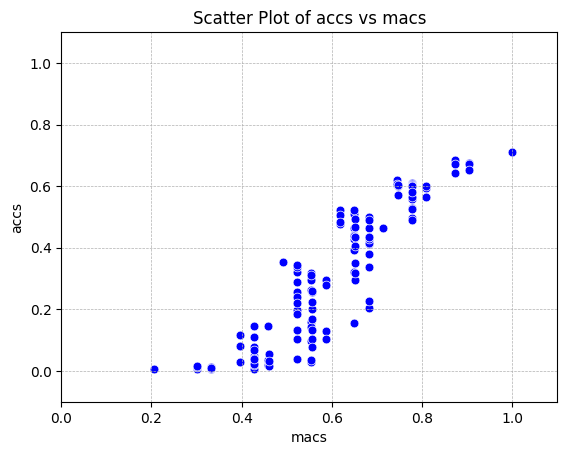

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Using Seaborn to plot
sns.scatterplot(data=df, x='macs', y='accs', color='blue', s=40)

plt.xlim(0, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Scatter Plot of accs vs macs')
plt.show()


In [16]:
df

,accs,macs
0,0.7124,1.000000
1,0.6752,0.872452
2,0.6740,0.904504
3,0.6836,0.872782
4,0.6714,0.904669
...,...,...
123,0.0140,0.300468
124,0.0136,0.332355
125,0.0172,0.300634
126,0.0104,0.332686
